In [ ]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")

df.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df['embarked'].unique()

<StringArray>
['S', 'C', 'Q', nan]
Length: 4, dtype: str

In [ ]:
df.shape

(891, 15)

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

*Handling Missing Values*

1. Dropping Rows (with missing values)

In [1]:
drop_rows = df.dropna()
print(drop_rows.shape)

NameError: name 'df' is not defined

2. Dropping Columns (with many missing values)

In [ ]:
drop_cols = df.drop(columns=["deck"])
print(drop_cols.columns)
df.shape

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='str')


(891, 15)

3. Mean Imputation

In [ ]:
df[df["age"].isnull()][["age"]].head(2)


,age
5,NaN
17,NaN


In [ ]:
mean_imp = df.copy()

mean_imp["age"] = mean_imp["age"].fillna(mean_imp["age"].mean())

In [ ]:
# After
mean_imp.[df["age"].isnull(), ["age"]].head(2)

,age
5,29.699118
17,29.699118


4. Median imputation

In [ ]:
df[df["age"].isnull()][["age"]].head(2)

,age
5,NaN
17,NaN


In [ ]:
median_imp = df.copy()
median_imp["age"] = median_imp["age"].fillna(median_imp["age"].median())


In [ ]:
median_imp.loc[df["age"].isnull(), ["age"]].head(2)

,age
5,28.0
17,28.0


5. Mode imputation

In [ ]:
df[df["embarked"].isnull()][["embarked"]].head(2)


,embarked
61,NaN
829,NaN


In [ ]:
mode_imp = df.copy()
mode_value = mode_imp["embarked"].mode()[0]
mode_imp["embarked"] = mode_imp["embarked"].fillna(mode_value)


In [ ]:
mode_imp.loc[df["embarked"].isnull(), ["embarked"]].head(2)


,embarked
61,S
829,S


6. Constant Value  imputation

In [ ]:
df[df["age"].isnull()][["age"]].head(2)

,age
5,NaN
17,NaN


In [ ]:
const_imp = df.copy()
const_imp["age"] = const_imp["age"].fillna(15)


In [ ]:
const_imp.loc[df["age"].isnull(), ["age"]].head(2)


,age
5,15.0
17,15.0


7. Group-based imputation (Group-based imputation fills missing values using statistical measures calculated within each category.)

In [ ]:
df[df["age"].isnull()][["sex", "age"]].head(2)


,sex,age
5,male,NaN
17,male,NaN


In [ ]:
group_imp = df.copy()

group_imp["age"] = group_imp.groupby("sex")["age"].transform(
    lambda x: x.fillna(x.mean())
)


In [ ]:
group_imp.loc[df["age"].isnull(), ["sex", "age"]].head(2)


,sex,age
5,male,30.726645
17,male,30.726645


8. Forward / Backward fill

In [ ]:
df[df["embarked"].isnull()][["embarked"]].head(2)


,embarked
61,NaN
829,NaN


In [ ]:
ffill_imp = df.copy()
ffill_imp["embarked"] = ffill_imp["embarked"].ffill()

In [ ]:
ffill_imp.loc[df["embarked"].isnull(), ["embarked"]].head(2)

,embarked
61,C
829,Q


II. Outlier Detection & Treatment

1. Box Plot and IQR

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

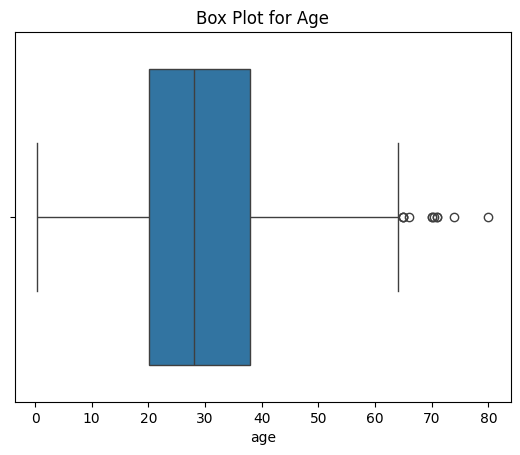

In [ ]:
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.show()

In [ ]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df["age"] < Q1 - 1.5*IQR) | (df["age"] > Q3 + 1.5*IQR)]


In [ ]:
print("Top 5 outliers in Age column:")
print(outliers["age"].head(5))

Top 5 outliers in Age column:
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
Name: age, dtype: float64


2. Z-score besed

In [ ]:
pip install scipy

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB ? eta -:--:--
     -------------------------- ------------- 41.0/61.0 kB 1.9 MB/s eta 0:00:01
     -------------------------- ------------- 41.0/61.0 kB 1.9 MB/s eta 0:00:01
     -------------------------- ------------- 41.0/61.0 kB 1.9 MB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 262.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 262.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 262.6 kB/s eta 0:00:01
     ----------


[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from scipy.stats import zscore
import numpy as np
# Take only first 20 rows for demo
demo_data = df["age"].head(100)

# Calculate Z-scores
z_scores = zscore(demo_data.dropna())

# Detect outliers (|Z| > 3)
z_outliers = demo_data.dropna()[np.abs(z_scores) > 2]

# Print up to 5 outliers
print("Z-score outliers (demo, top 5):")
print(z_outliers.head(5))


Z-score outliers (demo, top 5):
11    58.0
33    66.0
54    65.0
94    59.0
96    71.0
Name: age, dtype: float64


3. Modified Z-score

In [ ]:
import numpy as np

# Take first 100 rows for demo
demo_data = df["age"].head(100).dropna()

# Calculate median and MAD
median_age = np.median(demo_data)
mad_age = np.median(np.abs(demo_data - median_age))

# Calculate Modified Z-scores
mod_z = 0.6745 * (demo_data - median_age) / mad_age

# Detect outliers (|Mod Z| > 3.5)
modz_outliers = demo_data[np.abs(mod_z) > 3.5]

# Print top 5 outliers
print("Modified Z-score outliers (demo, top 5):")
print(modz_outliers.head(5))


Modified Z-score outliers (demo, top 5):
96    71.0
Name: age, dtype: float64


5. Percentile

In [ ]:
import numpy as np

# Take 'age' column
age_data = df["age"].dropna()  # remove NaN for calculation

# Calculate percentiles
p1 = np.percentile(age_data, 1)   # 1st percentile
p99 = np.percentile(age_data, 99) # 99th percentile

print("1st percentile (P1):", p1)
print("99th percentile (P99):", p99)

# Detect outliers
percentile_outliers = age_data[(age_data < p1) | (age_data > p99)]

# Print top 5 outliers
print("Percentile-based outliers (top 5):")
print(percentile_outliers.head(5))


1st percentile (P1): 1.0
99th percentile (P99): 65.87
Percentile-based outliers (top 5):
33     66.00
78      0.83
96     71.00
116    70.50
305     0.92
Name: age, dtype: float64


Outlier Treatment

1. Trimming

In [ ]:
sample_fare = df["fare"].head(20)
print("Original fare values:")

Original fare values:


In [ ]:
p1 = np.percentile(df["fare"].dropna(), 10)
p99 = np.percentile(df["fare"].dropna(), 90)

trimmed_fare = sample_fare[(sample_fare >= p1) & (sample_fare <= p99)]
print("After Trimming:")
print(trimmed_fare)

After Trimming:
1     71.2833
2      7.9250
3     53.1000
4      8.0500
5      8.4583
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
15    16.0000
16    29.1250
17    13.0000
18    18.0000
Name: fare, dtype: float64


2. Capping (limit extreme fares)

In [ ]:
capped_fare = sample_fare.copy()
capped_fare[capped_fare < p1] = p1
capped_fare[capped_fare > p99] = p99

print("After Capping:")
print(capped_fare)

After Capping:
0      7.5500
1     71.2833
2      7.9250
3     53.1000
4      8.0500
5      8.4583
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
15    16.0000
16    29.1250
17    13.0000
18    18.0000
19     7.5500
Name: fare, dtype: float64


3. Transformation (log to squeeze large fares)

In [ ]:
transformed_fare = np.log1p(sample_fare)  # log(1+fare)
print("After Log Transformation:")
print(transformed_fare)


After Log Transformation:
0     2.110213
1     4.280593
2     2.188856
3     3.990834
4     2.202765
5     2.246893
6     3.967694
7     3.094446
8     2.495954
9     3.436268
10    2.873565
11    3.316003
12    2.202765
13    3.474293
14    2.180892
15    2.833213
16    3.405355
17    2.639057
18    2.944439
19    2.107178
Name: fare, dtype: float64


4. Binning (categorize fares)

In [ ]:
bins = [0, 10, 50, 100, 600]
labels = ['Low', 'Medium', 'High', 'Very High']
binned_fare = pd.cut(sample_fare, bins=bins, labels=labels)
print("After Binning:")
print(binned_fare)


After Binning:
0        Low
1       High
2        Low
3       High
4        Low
5        Low
6       High
7     Medium
8     Medium
9     Medium
10    Medium
11    Medium
12       Low
13    Medium
14       Low
15    Medium
16    Medium
17    Medium
18    Medium
19       Low
Name: fare, dtype: category
Categories (4, str): ['Low' < 'Medium' < 'High' < 'Very High']


5. Robust Statistics (Replace any fare above 99th percentile with median (robust approach))

In [ ]:
median_fare = df["fare"].median()
robust_fare = sample_fare.copy()
robust_fare[robust_fare > p99] = median_fare
print("After Robust Treatment:")
print(robust_fare)


After Robust Treatment:
0      7.2500
1     71.2833
2      7.9250
3     53.1000
4      8.0500
5      8.4583
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
15    16.0000
16    29.1250
17    13.0000
18    18.0000
19     7.2250
Name: fare, dtype: float64


3. Data Transformation

1. One-Hot Encoding

In [ ]:
import pandas as pd

# Take first 5 rows for demo
demo_data = df[["embarked"]].head(5)

# One-Hot Encoding with integer values
encoded_data = pd.get_dummies(demo_data, prefix="embarked", dtype=int)

print("Original data:")
print(demo_data)

print("\nOne-Hot Encoded data:")
print(encoded_data)

Original data:
  embarked
0        S
1        C
2        S
3        S
4        S

One-Hot Encoded data:
   embarked_C  embarked_S
0           0           1
1           1           0
2           0           1
3           0           1
4           0           1


2. Label Encoding

In [ ]:
import pandas as pd

# Take first 10 rows of 'embarked' column
demo_data = df[["embarked"]].head(10).copy()
print("Original values:")
print(demo_data)

# Label Encoding using Pandas factorize
demo_data["embarked_encoded"] = pd.factorize(demo_data["embarked"])[0]

print("\nLabel Encoded values:")
print(demo_data)


Original values:
  embarked
0        S
1        C
2        S
3        S
4        S
5        Q
6        S
7        S
8        S
9        C

Label Encoded values:
  embarked  embarked_encoded
0        S                 0
1        C                 1
2        S                 0
3        S                 0
4        S                 0
5        Q                 2
6        S                 0
7        S                 0
8        S                 0
9        C                 1


V. Normalization

In [ ]:
import pandas as pd
import numpy as np

# Sample data: first 10 rows of fare
demo_data = df[["fare"]].head(10).copy()
print("Original Fare values:")
print(demo_data)

Original Fare values:
      fare
0   7.2500
1  71.2833
2   7.9250
3  53.1000
4   8.0500
5   8.4583
6  51.8625
7  21.0750
8  11.1333
9  30.0708


1. Z-score

In [ ]:
demo_data["fare_zscore"] = (demo_data["fare"] - demo_data["fare"].mean()) / demo_data["fare"].std()
print("\nZ-Score Normalized Fare:")
print(demo_data[["fare", "fare_zscore"]])


Z-Score Normalized Fare:
      fare  fare_zscore
0   7.2500    -0.837678
1  71.2833     1.875375
2   7.9250    -0.809078
3  53.1000     1.104959
4   8.0500    -0.803782
5   8.4583    -0.786483
6  51.8625     1.052527
7  21.0750    -0.251921
8  11.1333    -0.673145
9  30.0708     0.129226


2. Min-Max 

In [ ]:
demo_data["fare_minmax"] = (demo_data["fare"] - demo_data["fare"].min()) / (demo_data["fare"].max() - demo_data["fare"].min())
print("\nMin-Max Normalized Fare:")
print(demo_data[["fare", "fare_minmax"]])


Min-Max Normalized Fare:
      fare  fare_minmax
0   7.2500     0.000000
1  71.2833     1.000000
2   7.9250     0.010541
3  53.1000     0.716034
4   8.0500     0.012493
5   8.4583     0.018870
6  51.8625     0.696708
7  21.0750     0.215903
8  11.1333     0.060645
9  30.0708     0.356390


3. Decimal Scaling

In [ ]:
j = len(str(int(demo_data["fare"].max())))  # number of digits of max value
demo_data["fare_decimal"] = demo_data["fare"] / (10**j)
print("\nDecimal Scaling Normalized Fare:")
print(demo_data[["fare", "fare_decimal"]])


Decimal Scaling Normalized Fare:
      fare  fare_decimal
0   7.2500      0.072500
1  71.2833      0.712833
2   7.9250      0.079250
3  53.1000      0.531000
4   8.0500      0.080500
5   8.4583      0.084583
6  51.8625      0.518625
7  21.0750      0.210750
8  11.1333      0.111333
9  30.0708      0.300708
